<a href="https://www.kaggle.com/code/akhildy07/income-prediction-random-forest-87?scriptVersionId=201378095" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


## Importing Essential Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.shape

(48842, 15)

### Converting our target variable values to binary form

In [6]:
df['income'] = df['income'].map({'>50K':1, '<=50K':0})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


### Dropping column 'fnlwgt' as it has no relation with target or any other variables

In [8]:
df.drop('fnlwgt',inplace=True,axis=1)

In [9]:
for var in df:
    print(var,'->',df[var].unique(),'\n')

age -> [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 

workclass -> ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education -> ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

educational-num -> [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 

marital-status -> ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation -> ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners

Here in column 'workclass' ,'Occupation' and 'native-country' null values are replaced with a '?'

## Handling Missing Values

In [10]:
df.replace('?',np.nan,inplace=True)

In [11]:
df.isnull().mean()*100

age                0.000000
workclass          5.730724
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

### Using Frequent Value Imputation to deal with missing values in categorical variables

In [12]:
def inpute_nan(df,variable):
    df[variable].fillna(df[variable].value_counts().index[0],inplace=True)

In [13]:
nan_var = ['workclass','occupation','native-country']
for var in nan_var:
    inpute_nan(df,var)

In [14]:
df.isnull().mean()

age                0.0
workclass          0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

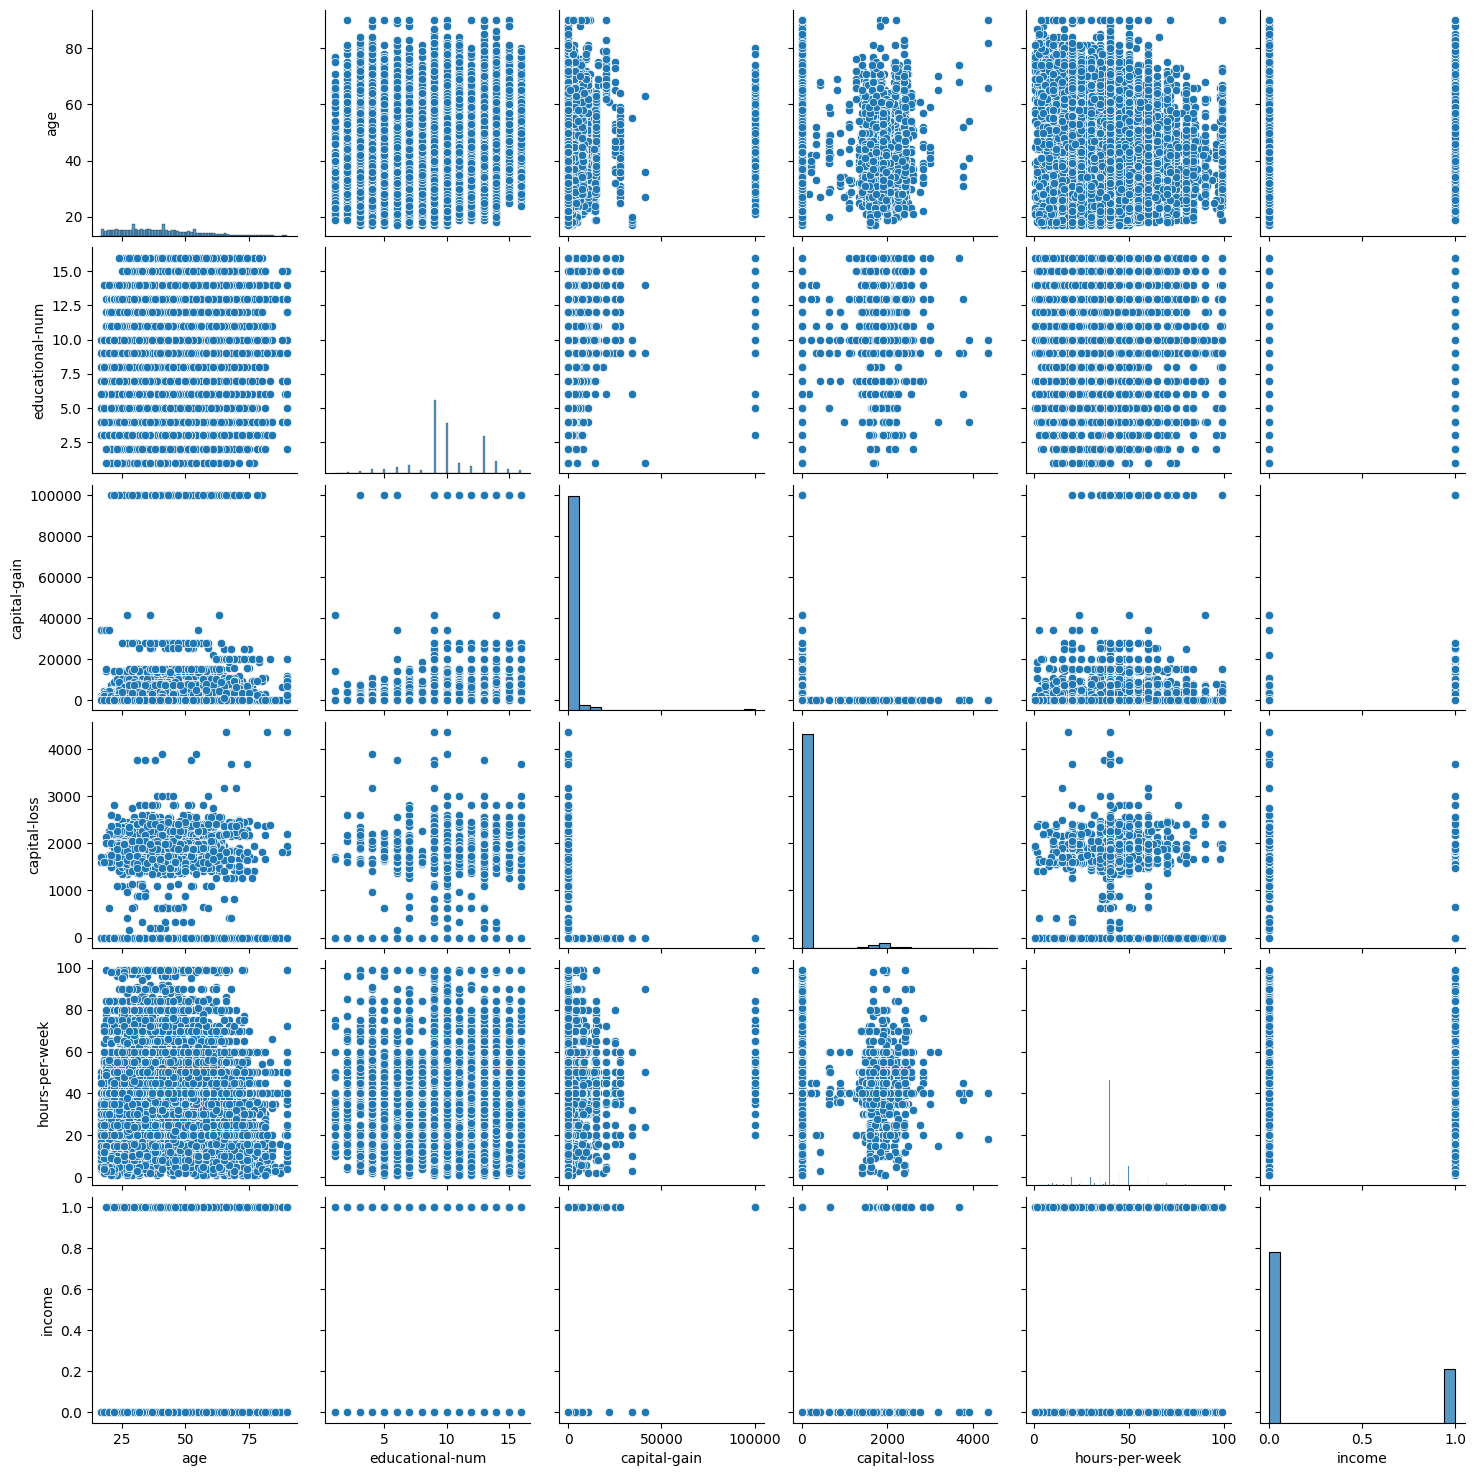

In [15]:
sns.pairplot(df)

## Removing outliers in numerical variables

### KNN model is heavily affected by outliers, thus its important to remove them for better accuracy

### Here only columns 'age' and 'hours-per-week' outliers are being dealt with as they have a large distribution of values

<Axes: xlabel='income', ylabel='age'>

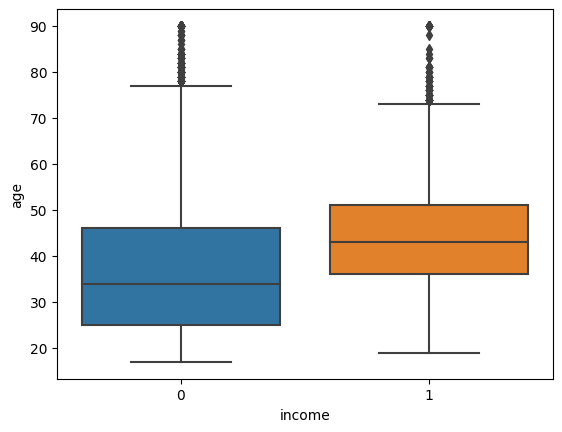

In [16]:
sns.boxplot(x='income',y='age',data=df)

In [17]:
age_0 = df[df['income']==0].age
age_1 = df[df['income']==1].age

### Using IQR methord to detect outliers in a variable

In [18]:
def detect_outliers(lt):
    iqr= lt.quantile(0.75)-lt.quantile(0.25)
    ub = lt.quantile(0.75)+1.5*iqr
    lb=lt.quantile(0.25)-1.5*iqr
    upper_array = lt.loc[lt > ub]
    lower_array = lt.loc[lt < lb]
    return upper_array,lower_array

In [19]:
age_0_upper = detect_outliers(age_0)[0]
for i in age_0_upper.index:
    df.drop(index=i,inplace=True)

In [20]:
age_1_upper = detect_outliers(age_1)[0]
for i in age_1_upper.index:
    df.drop(index=i,inplace=True)

<Axes: xlabel='income', ylabel='age'>

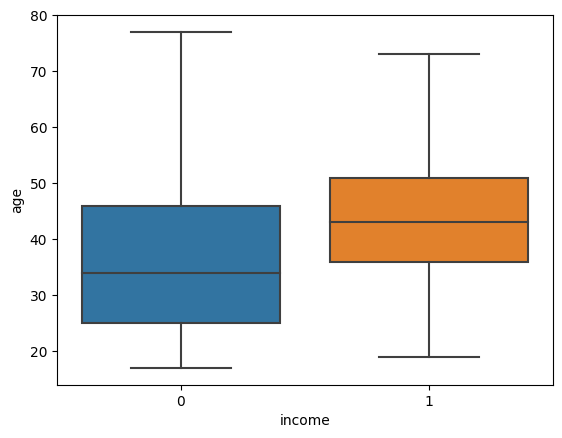

In [21]:
sns.boxplot(x='income',y='age',data=df)

<Axes: xlabel='income', ylabel='hours-per-week'>

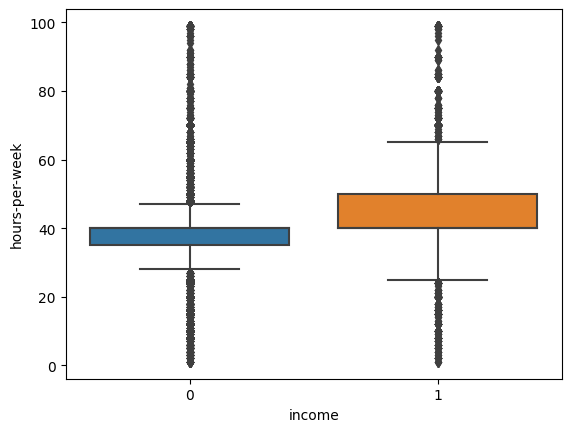

In [22]:
sns.boxplot(x='income',y='hours-per-week',data=df)

In [23]:
hours_0 = df.loc[df['income']==0,'hours-per-week']
hours_1 = df.loc[df['income']==1,'hours-per-week']

In [24]:
hours_0_upper = detect_outliers(hours_0)[0]
hours_0_lower = detect_outliers(hours_0)[1]

for i in hours_0_upper.index:
    df.drop(index=i,inplace=True)

In [25]:
for i in hours_0_lower.index:
    df.drop(index=i,inplace=True)

In [26]:
hours_1_upper = detect_outliers(hours_1)[0]
hours_1_lower = detect_outliers(hours_1)[1]

for i in hours_1_upper.index:
    df.drop(index=i,inplace=True)


In [27]:
for i in hours_1_lower.index:
    df.drop(index=i,inplace=True)

<Axes: xlabel='income', ylabel='hours-per-week'>

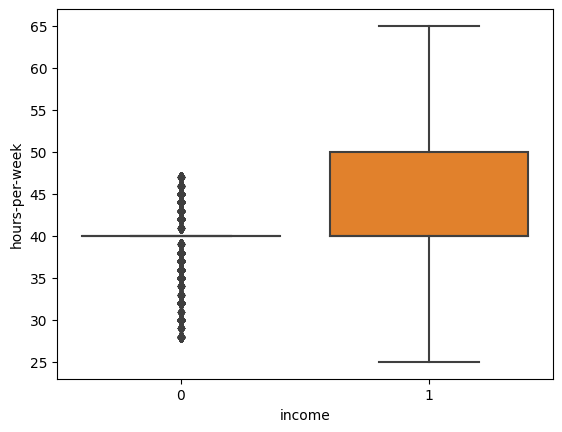

In [28]:
sns.boxplot(x='income',y='hours-per-week',data=df)

## EDA through Data Visualization

<Axes: xlabel='workclass', ylabel='count'>

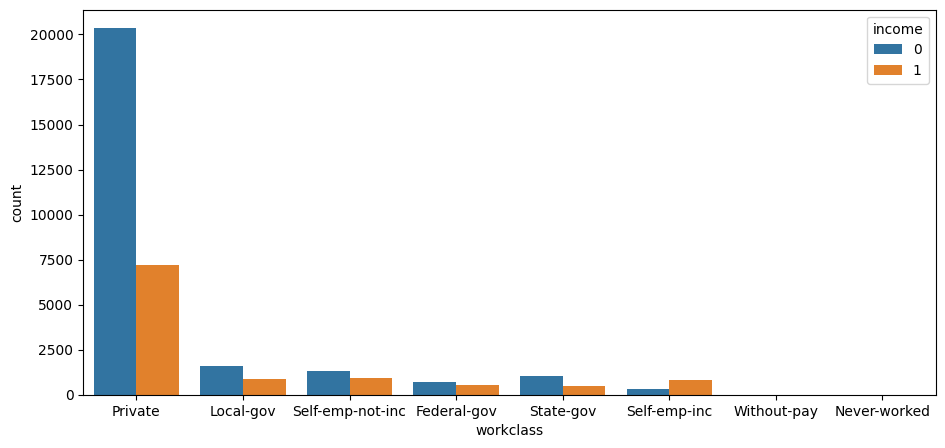

In [29]:
plt.figure(figsize=(11,5))
sns.countplot(x='workclass',hue='income',data=df)

Private sector have most no. of employees having income >=50k and <=50k

<Figure size 1000x500 with 0 Axes>

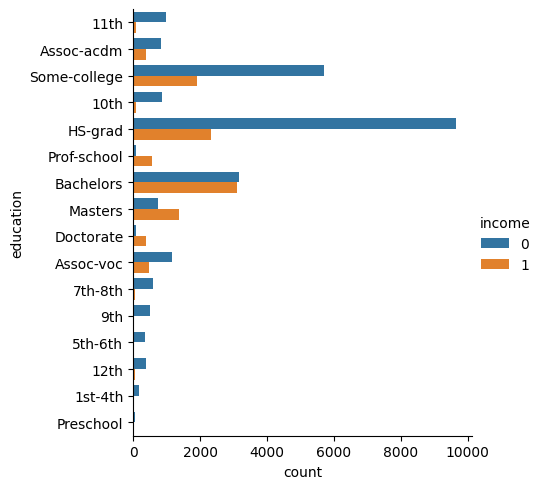

In [30]:
plt.figure(figsize=(10,5 ))
sns.catplot(y='education',hue='income',kind='count',data=df)

High School Grads have highest share in income <=50k whereas Bachelors have highest share in income >=50k

<Axes: xlabel='gender', ylabel='count'>

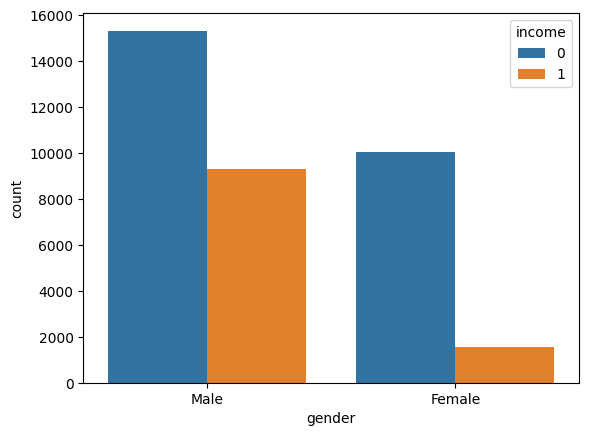

In [31]:
sns.countplot(x='gender',hue='income',data=df)

Males dominate the income level in both categories

<Axes: xlabel='count', ylabel='marital-status'>

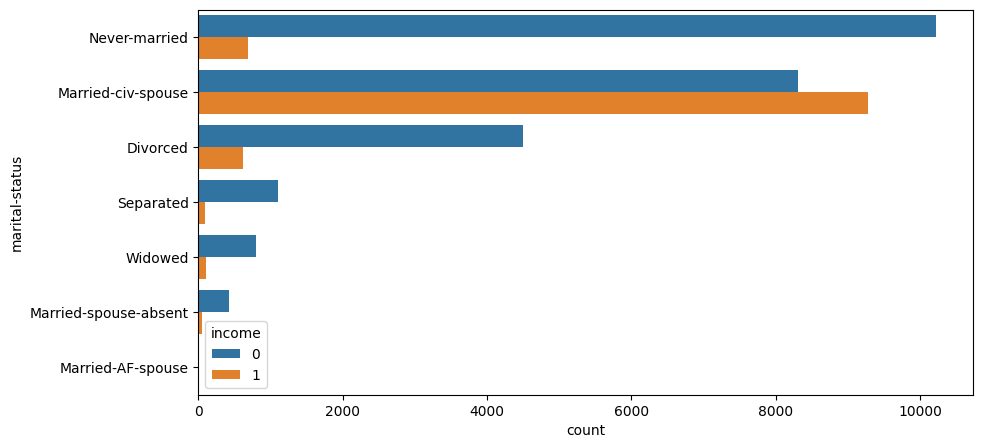

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(y='marital-status',hue='income',data=df)

Never Married guys have highest share in <=50k income level whereas couples have highest share in income level >=50k

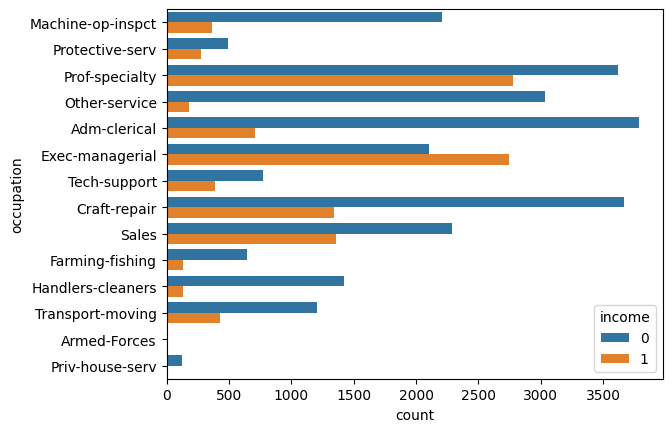

In [33]:
sns.countplot(y="occupation", hue="income",data=df);

Adminstrative Clerical jobs have highest share in <=50k income levels whereas Professional Speciality jobs have highest share in >=50 income

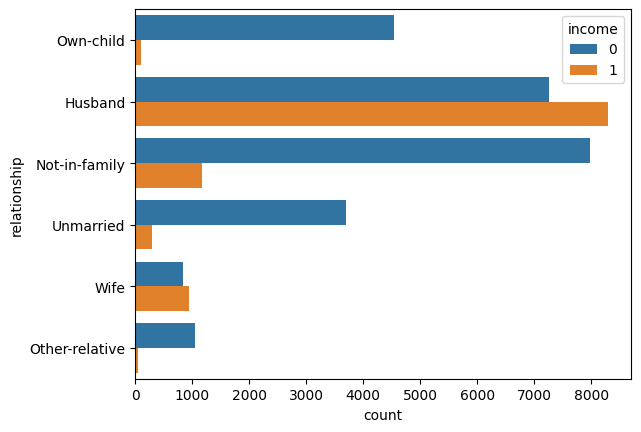

In [34]:
sns.countplot(y="relationship", hue="income",data=df);

Husband dominate the income levels in both categories

<Figure size 2000x700 with 0 Axes>

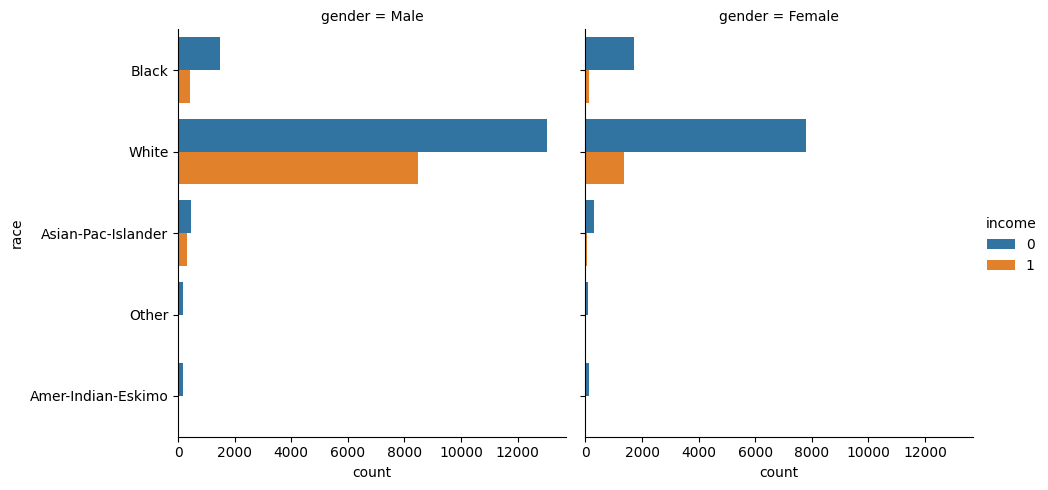

In [35]:
plt.figure(figsize=(20,7))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df);

White Males and Females have highest income levels in both categories

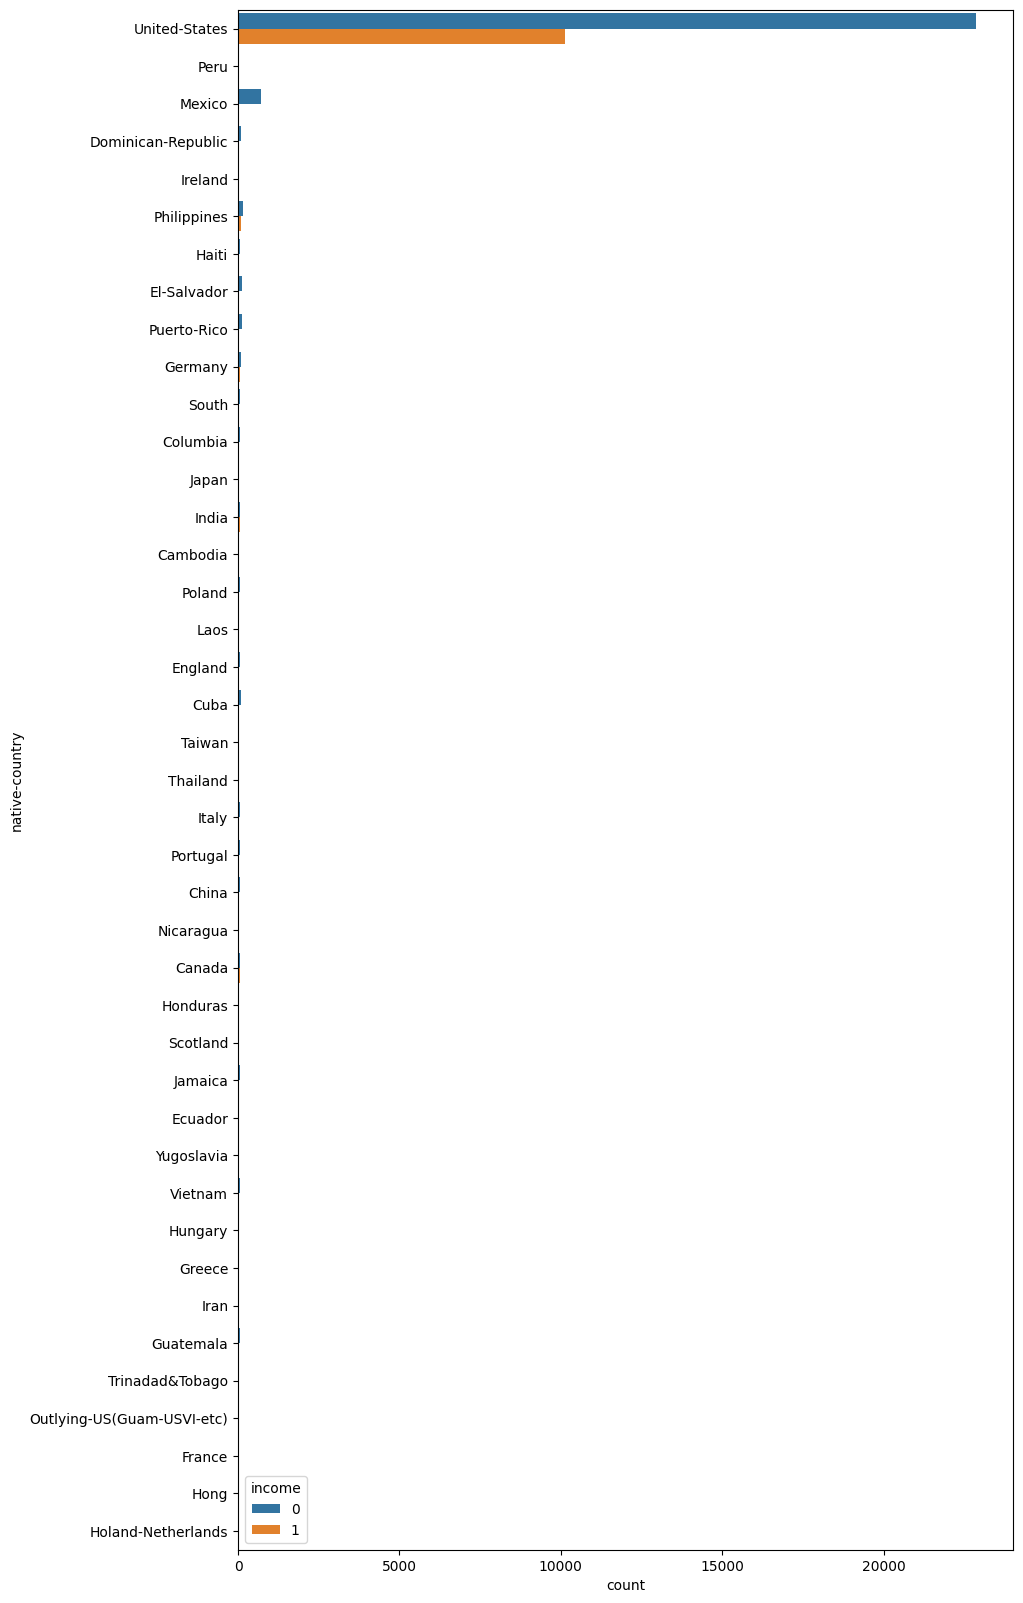

In [36]:
plt.figure(figsize=(10,20))
sns.countplot(y="native-country", hue="income", data=df);

This data has majority representation from United States

<Axes: xlabel='capital-gain', ylabel='Count'>

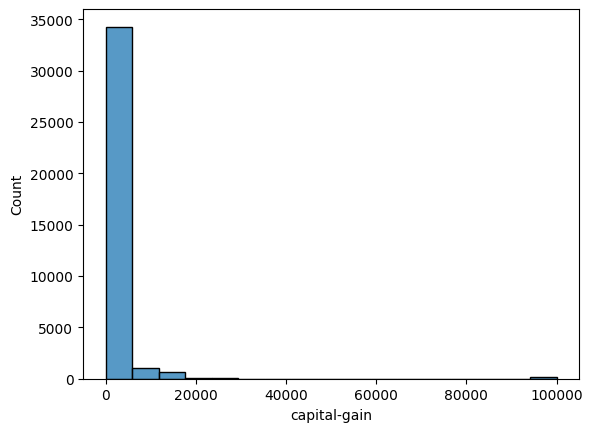

In [37]:
sns.histplot(x='capital-gain',data=df)

<Axes: xlabel='capital-loss', ylabel='Count'>

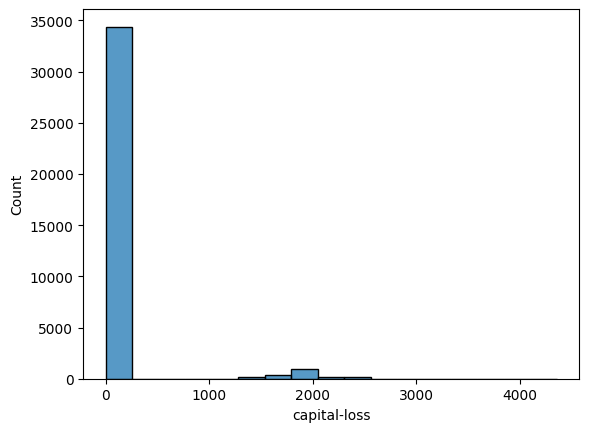

In [38]:
sns.histplot(x='capital-loss',data=df)

In [39]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income
count,36216.000000,36216.000000,36216.000000,36216.000000,36216.000000,36216.000000
mean,38.834438,10.175364,1270.300309,95.297548,40.958306,0.299398
std,12.461137,2.569123,8084.889225,419.720179,5.702213,0.458001
min,17.000000,1.000000,0.000000,0.000000,25.000000,0.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,40.000000,1.000000
max,77.000000,16.000000,99999.000000,4356.000000,65.000000,1.000000


In [40]:
df.shape

(36216, 14)

## Data preprocessing

### Encoding categorical variables to numerical form

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()
df[['age', 'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'capital-gain', 'capital-loss','hours-per-week', 'native-country']]=df[['age', 'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'capital-gain', 'capital-loss','hours-per-week', 'native-country']].apply(le.fit_transform)

In [43]:
df.income.value_counts()

income
0    25373
1    10843
Name: count, dtype: int64

In [44]:
imbalance_ratio = df.income.value_counts()[0]/df.income.value_counts()[1]
imbalance_ratio

2.3400350456515726

This shows data is highly imbalanced with majority representation of class <=50k

### Handling imbalance in dataset

#### Oversampling of minority class

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
independent_var = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [47]:
smt = SMOTE(random_state=42)
X_res,Y_res = smt.fit_resample(independent_var,target)

from collections import Counter
print('original Dataset :',Counter(target))
print('Resampled Dataset :',Counter(Y_res))

original Dataset : Counter({0: 25373, 1: 10843})
Resampled Dataset : Counter({0: 25373, 1: 25373})


## Implementing KNN model in our dataset

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res,test_size=0.2,random_state=42)

### Scaling independent variables

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_standard = sc.fit_transform(x_train)
x_test_standard = sc.transform(x_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_standard,y_train)

KNeighborsClassifier()

In [52]:
pred = knn.predict(x_test_standard)

In [53]:
from sklearn.metrics import accuracy_score
print('Accuracy of Model: ',accuracy_score(pred,y_test))

Accuracy of Model:  0.8669950738916257


              precision    recall  f1-score   support

           0       0.88      0.85      0.86      5068
           1       0.86      0.88      0.87      5082

    accuracy                           0.87     10150
   macro avg       0.87      0.87      0.87     10150
weighted avg       0.87      0.87      0.87     10150



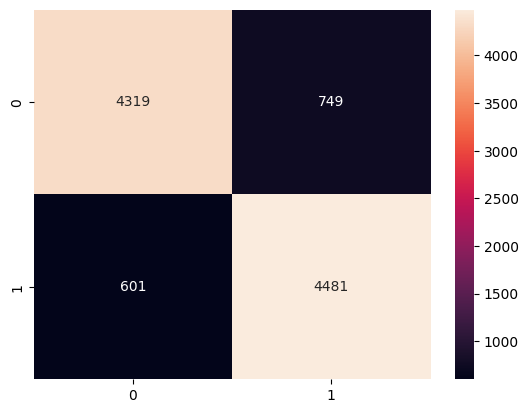

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

cf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix,annot=True,fmt='g')

print(classification_report(y_test,pred))

In [55]:
from sklearn.model_selection import cross_val_score

accuracy_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,independent_var,target,cv=10,scoring='accuracy')
    accuracy_rate.append(score.mean())

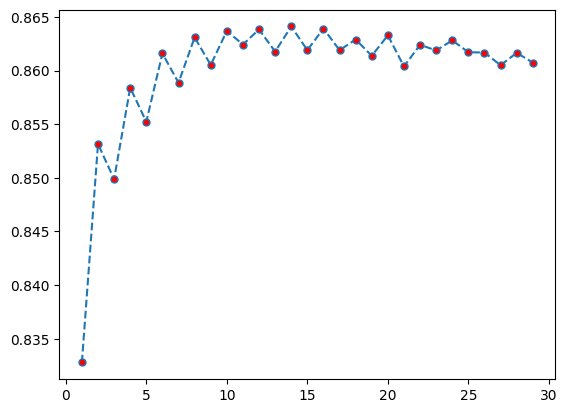

In [56]:
plt.plot(range(1,30),accuracy_rate,linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)
plt.show()

In [57]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train_standard,y_train)
y_pred = knn.predict(x_test_standard)

Accuracy Score with K = 14 : 0.8612807881773399 

Classification Report for K = 14 :
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5024
           1       0.87      0.86      0.86      5126

    accuracy                           0.86     10150
   macro avg       0.86      0.86      0.86     10150
weighted avg       0.86      0.86      0.86     10150



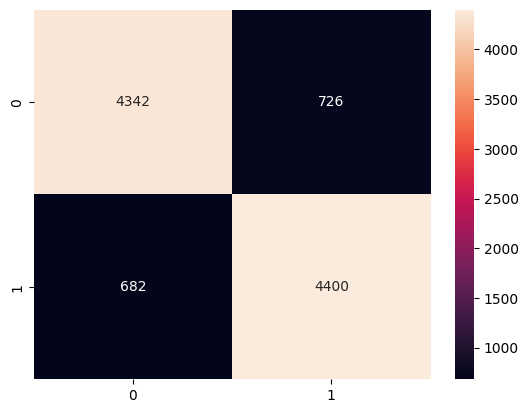

In [58]:
print('Accuracy Score with K = 14 :',accuracy_score(y_pred,y_test),'\n')
print('Classification Report for K = 14 :\n',classification_report(y_pred,y_test))

cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,fmt='g')
plt.show()

Intrestingly, here we can observe that for k=14 the accuracy is approximately equal to that of k=5. Its probable reason can be that for k=14, model is being slighly underfitted for test dataset.

## Implementing Naive Bayes

Accuracy for Naive Bayes : 0.8013793103448276

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      6098
           1       0.70      0.88      0.78      4052

    accuracy                           0.80     10150
   macro avg       0.80      0.81      0.80     10150
weighted avg       0.82      0.80      0.80     10150



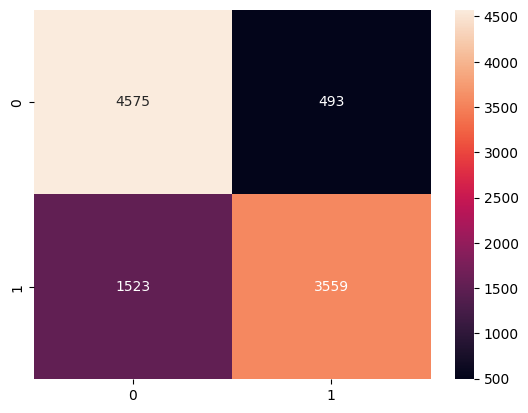

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

print('Accuracy for Naive Bayes :',accuracy_score(y_pred,y_test))
print('\nClassification Report :\n',classification_report(y_pred,y_test))
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,fmt='g')
plt.show()

In Naive Bayes, we are getting low accuracy than KNN with a high type-1 error

## Implementing Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfg = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth=5,verbose=True)

In [61]:
rfg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s


RandomForestClassifier(max_depth=5, verbose=True)

In [62]:
y_pred = rfg.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy for Random Forest : 0.8435467980295567

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.89      0.83      4512
           1       0.90      0.81      0.85      5638

    accuracy                           0.84     10150
   macro avg       0.84      0.85      0.84     10150
weighted avg       0.85      0.84      0.84     10150



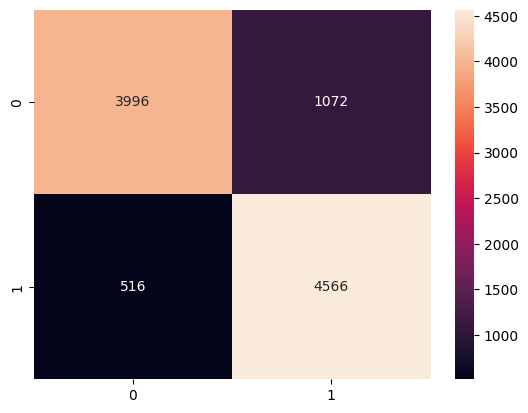

In [63]:
print('Accuracy for Random Forest :',accuracy_score(y_pred,y_test))
print('\nClassification Report :\n',classification_report(y_pred,y_test))
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,fmt='g')
plt.show()

### Hyperparameter tuning for random forest using Grid Search CV

In [64]:
params = {
    'n_estimators' : [50,100,150,200],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' : ['gini','entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [65]:
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(estimator=rfg,param_grid=params,cv=5,verbose=True,n_jobs=-1)

In [66]:
gsc.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5, verbose=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=True)

In [67]:
gsc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 50}

In [68]:
rfc_tuned = RandomForestClassifier(criterion = 'gini',max_depth = 9,max_features = 'sqrt',n_estimators = 150,verbose=True)

In [69]:
rfc_tuned.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s


RandomForestClassifier(max_depth=9, n_estimators=150, verbose=True)

In [70]:
y_pred_tuned = rfc_tuned.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Accuracy for Hyperparameter tuned Random Forest : 0.8689655172413793

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4634
           1       0.91      0.84      0.87      5516

    accuracy                           0.87     10150
   macro avg       0.87      0.87      0.87     10150
weighted avg       0.87      0.87      0.87     10150



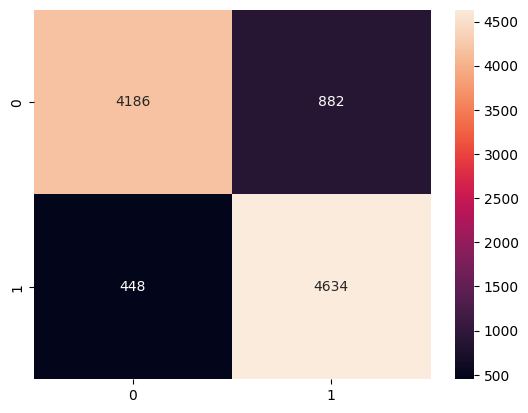

In [71]:
print('Accuracy for Hyperparameter tuned Random Forest :',accuracy_score(y_pred_tuned,y_test))
print('\nClassification Report :\n',classification_report(y_pred_tuned,y_test))
cf_matrix = confusion_matrix(y_test,y_pred_tuned)
sns.heatmap(cf_matrix,annot=True,fmt='g')
plt.show()